# Loan Prediction Project Report

 **Objective**
The goal of this project is to predict whether a loan will be approved (Loan_Status) based on applicant details using machine learning. The dataset is provided by Analytics Vidhya, consisting of applicant demographics, financial data, and loan attributes.

**Problem Statement**
The goal of this project was to develop a machine learning model that predicts whether a loan application should be approved (Y) or rejected (N) based on applicant information. The model needed to:

1. Handle real-world banking data with missing values and imbalances

2. Provide transparent decision-making (explainable AI)

3. Maintain high precision (avoid bad loans) while keeping good recall (approve qualified applicants)

**Milestone 1: Feature Engineering & Selection**

This script covers:
1. Data Exploration & Analysis (EDA)
2. Feature Engineering
3. Feature Selection

Key Concepts Explained:
- EDA: Understanding data distributions, missing values, and correlations helps identify data quality issues and relationships between variables.
- Feature Engineering: Creating new meaningful features from raw data can significantly improve model performance.
- Feature Selection: Choosing the most relevant features reduces dimensionality and can prevent overfitting.
- Encoding Techniques: Converting categorical data to numerical formats that models can process.
- Statistical Tests: Help identify significant relationships between features and target variable.

In [21]:
#importing the libaries
import pandas as pd #Used for data manipulation and analysis, especially for working with tabular data (DataFrames and Series).
import numpy as np #Provides support for numerical operations, including arrays, matrices, and mathematical functions.
import matplotlib.pyplot as plt #Used for creating visualizations, such as line plots, bar charts, scatter plots, etc.
import seaborn as sns #It provides attractive statistical graphics like heatmaps, violin plots, and boxplots.
from sklearn.preprocessing import LabelEncoder, StandardScaler #mports two tools from Scikit-learn's preprocessing module
#LabelEncoder: Converts categorical string labels into numeric form.
#StandardScaler: Standardizes features by removing the mean and scaling to unit variance.
from sklearn.feature_selection import SelectKBest, f_classif #Imports tools for feature selection
from sklearn.decomposition import PCA #Imports Principal Component Analysis (PCA) from Scikit-learn.
from sklearn.ensemble import RandomForestClassifier

In [2]:
#load the data
train_df = pd.read_csv("C:/Users/mamat/Downloads/train (1).csv")
test_df = pd.read_csv("C:/Users/mamat/Downloads/test.csv")

**Exploratory data analysis**
    
    Why we do this:
    
    - Understand data distributions to identify skewness or outliers
    - Check for missing values that need imputation
    - Examine correlations between features
    - Identify potential data quality issues

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  614 non-null    object 
 1   Gender                   614 non-null    int64  
 2   Married                  614 non-null    int64  
 3   Dependents               614 non-null    int32  
 4   Education                614 non-null    int64  
 5   Self_Employed            614 non-null    int64  
 6   ApplicantIncome          614 non-null    int64  
 7   CoapplicantIncome        614 non-null    float64
 8   LoanAmount               614 non-null    float64
 9   Loan_Amount_Term         614 non-null    float64
 10  Credit_History           614 non-null    float64
 11  Loan_Status              614 non-null    int64  
 12  TotalIncome              614 non-null    float64
 13  IncomeToLoanRatio        614 non-null    float64
 14  LoanAmount_log           6

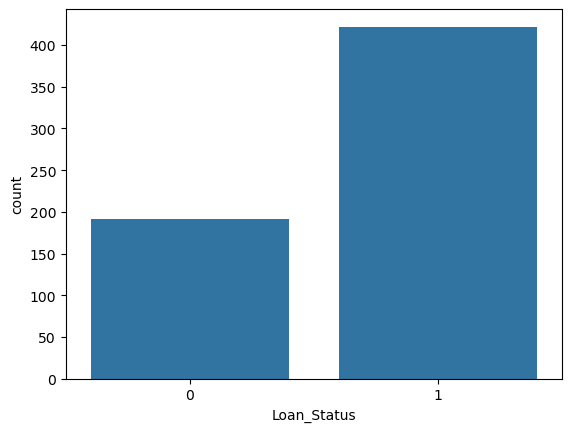

In [22]:
# Exploratory Data Analysis
print(train_df.info()) # to look at the basic infromation
print(train_df.describe(include='all')) #to describe the table
print(train_df.isnull().sum()) # to see null value
#When you build a machine learning model, the model is trained on the train.csv file and then tested or validated on the test.csv file. 
#If your test data has missing values or is not cleaned the same way as train data, your model may give incorrect or poor results.
sns.countplot(x='Loan_Status', data=train_df)
plt.show()

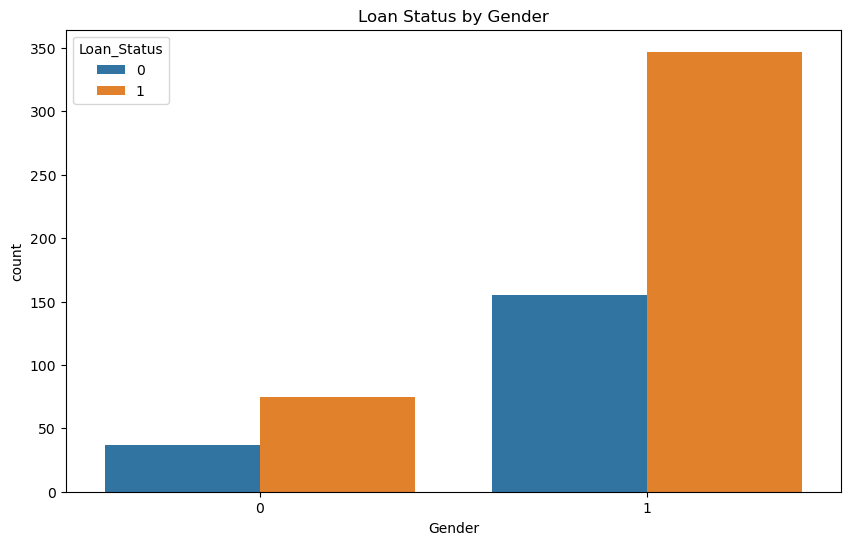

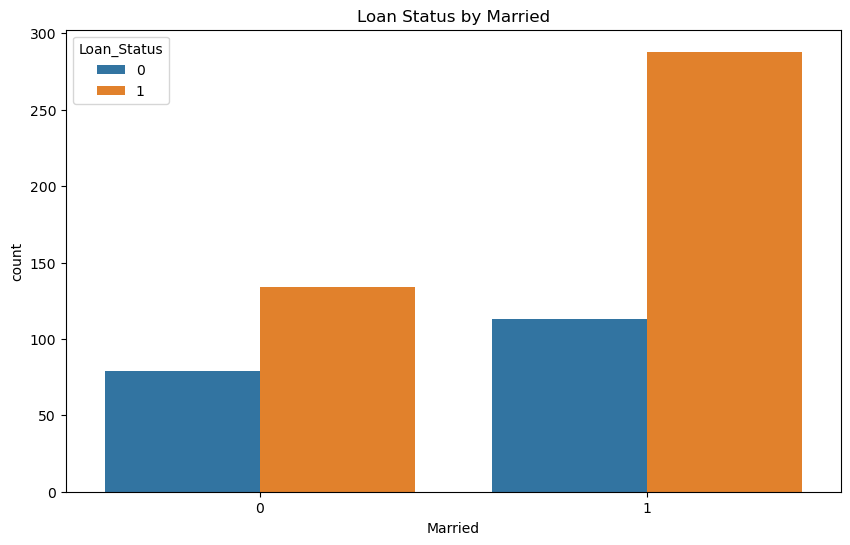

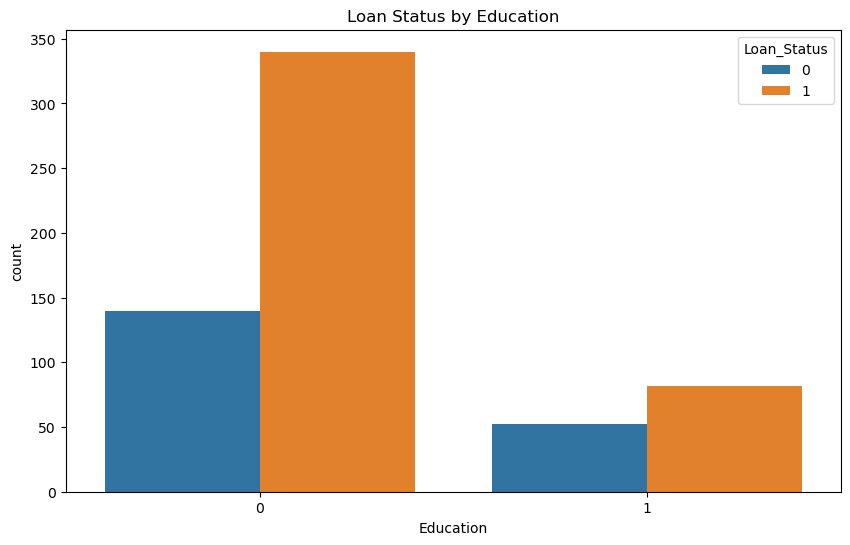

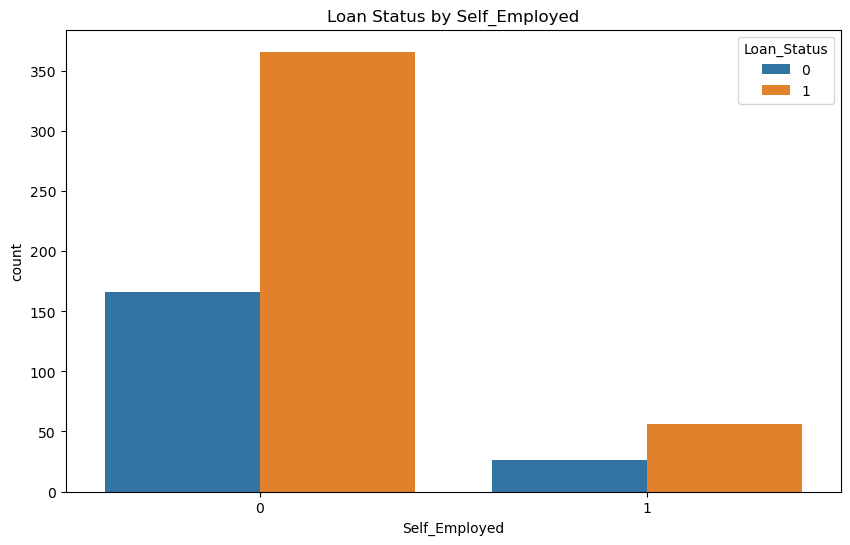

In [36]:
# Loop through selected categorical features to analyze their relationship with Loan Status
for col in ['Gender', 'Married', 'Education', 'Self_Employed']:
    plt.figure(figsize=(10,6)) # Set the figure size for each plot to ensure clarity
    sns.countplot(x=col, hue='Loan_Status', data=train_df) # Create a count plot for the current categorical feature,
    plt.title(f'Loan Status by {col}') # Add a title 
    plt.show()  # Display the plot before moving to the next feature

In [24]:
# Handle missing values
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed']:
    train_df[col].fillna(train_df[col].mode()[0], inplace=True)
train_df['LoanAmount'].fillna(train_df['LoanAmount'].median(), inplace=True) # Fill numeric missing values with median
train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].median(), inplace=True) # Fill numeric missing values with median
train_df['Credit_History'].fillna(train_df['Credit_History'].mode()[0], inplace=True) # Fill categorical missing values with mode

C:\Users\mamat\AppData\Local\Temp\ipykernel_20320\1724112191.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(train_df[col].mode()[0], inplace=True)
C:\Users\mamat\AppData\Local\Temp\ipykernel_20320\1724112191.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

**Feature enginerring**
new features and transform existing ones to enhance model performance.
    
    Why we do this:
    - Combine related features to create more meaningful predictors
    - Transform skewed data to normal distributions
    - Encode categorical variables for model compatibility
    - Create interaction terms that might have predictive power
    - Handle missing values appropriately

In [25]:
# Feature Engineering
# Create total income by combining applicant and co-applicant income
train_df['TotalIncome'] = train_df['ApplicantIncome'] + train_df['CoapplicantIncome']
# Create a ratio to reflect loan affordability based on income
train_df['IncomeToLoanRatio'] = train_df['TotalIncome'] / train_df['LoanAmount']
# Apply log transformation to reduce skewness in LoanAmount
train_df['LoanAmount_log'] = np.log(train_df['LoanAmount'] + 1)
# Create a ratio of loan amount to loan term, reflecting repayment intensity
train_df['LoanAmountTermRatio'] = train_df['LoanAmount'] / train_df['Loan_Amount_Term']

In [26]:
# Encode categorical features
# Initialize LabelEncoder (converts categories to integers e.g., Male=1, Female=0)
label_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status']
le = LabelEncoder() # Encode binary categorical variables into numeric using LabelEncoder
for col in label_cols: # Apply encoding to each categorical column
    train_df[col] = le.fit_transform(train_df[col])
train_df['Dependents'] = train_df['Dependents'].replace('3+', 3).astype(int) # Replace '3+' in Dependents with 3 and convert to integer


In [27]:
# Feature Selection using SelectKBest

"""
    Select the most important features using statistical methods.
    
    Why we do this:
    - Reduce dimensionality to improve model performance
    - Remove irrelevant or redundant features
    - Speed up model training
    - Potentially improve model interpretability
    """
# Prepare features (X) and target (y) for modeling
# Dropping irrelevant columns (Loan_ID) and redundant features (raw incomes/loan amounts)
X = train_df.drop(['Loan_ID', 'Loan_Status', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], axis=1)
y = train_df['Loan_Status']
# Feature selection using ANOVA F-test (measures linear relationship with target)
selector = SelectKBest(score_func=f_classif, k='all')  # k='all' keeps all features
selector.fit(X, y) # Computes F-scores
# Display feature scores in descending order (higher score = more predictive power)
feature_scores = pd.Series(selector.scores_, index=X.columns).sort_values(ascending=False)
print(feature_scores) # Print feature scores

Credit_History             252.652090
Property_Area_Semiurban     11.626448
Married                      5.164552
Education                    4.547685
Property_Area_Urban          1.166722
LoanAmount_log               0.896310
TotalIncome                  0.599037
IncomeToLoanRatio            0.348904
Loan_Amount_Term             0.311334
Gender                       0.198059
LoanAmountTermRatio          0.084604
Dependents                   0.062665
Self_Employed                0.008380
dtype: float64


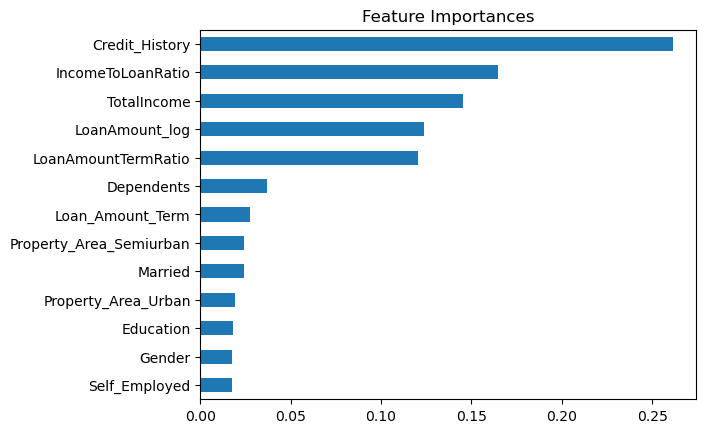

In [28]:
# Feature Importance using Random Forest
model = RandomForestClassifier() # Default parameters
model.fit(X, y) # Train on all features
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh') # Horizontal bar plot
plt.title('Feature Importances')
plt.show() # Displays the plot

# Milestone 2: Model Enhancement & Tuning

This covers:

- Hyperparameter Tuning: Finding optimal model configuration for best performance.
- Cross-Validation: Robust evaluation technique to prevent data leakage and overfitting.
- Regularization: Techniques to prevent overfitting by penalizing complex models.
- Model Architectures: Experimenting with different algorithms to find the best performer.
- Ensemble Methods: Combining multiple models to improve predictive performance.

In [29]:
# Split the data into training and testing sets
# random_state=42 ensures reproducibility
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Fixed random seed

In [30]:
# Task 1: Hyperparameter Tuning using GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

"""
    Find optimal hyperparameters for different models.
    
    Why we do this:
    - Default parameters are rarely optimal for specific datasets
    - Proper tuning can significantly improve model performance
    - Different problems require different model configurations
    - Helps balance bias-variance tradeoff
    """

param_grid = {
    'n_estimators': [100, 200],  # Number of trees (more trees = better but slower)
    'max_depth': [None, 5, 10], # Tree depth (None = unlimited, 5/10 = restricts depth)
    'min_samples_split': [2, 5] # Min samples to split a node (2 = default, 5 = conservative)
}
# Initialize GridSearchCV with 5-fold cross-validation
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
# Fit the grid search to training data
print('Best parameters:', grid.best_params_)
print('Best cross-validation accuracy:', grid.best_score_)

Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation accuracy: 0.8166151309008451


In [31]:
# Task 2: Cross-Validation
# Evaluate the best model using 5-fold cross-validation on the full dataset
from sklearn.model_selection import cross_val_score
best_rf = grid.best_estimator_  # Get the best model from GridSearchCV
cv_scores = cross_val_score(best_rf, X, y, cv=5) # 5-fold CV scores
print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Average CV Accuracy: {cv_scores.mean()}')

Cross-Validation Accuracy Scores: [0.79674797 0.7804878  0.78861789 0.83739837 0.78688525]
Average CV Accuracy: 0.7980274556843929


In [12]:
# Task 3: Model Architecture Comparison
# Purpose: Compare performance of different machine learning algorithms on the loan approval dataset
from sklearn.linear_model import LogisticRegression # Linear classification model
from xgboost import XGBClassifier # Gradient boosting model (optimized for performance)
# Define a dictionary of models to compare:
 # 1. Logistic Regression (Baseline Linear Model)
    # - Simple, interpretable, but assumes linear decision boundaries
    # - max_iter=1000 ensures convergence (default may not suffice for some datasets)
 # 2. Random Forest (Best Tuned Model from GridSearchCV)
    # - Ensemble of decision trees, handles non-linear relationships well
    # - best_rf is the optimized model from earlier hyperparameter tuning
# 3. XGBoost (Gradient Boosting)
    # - State-of-the-art boosting algorithm, often high accuracy
    # - use_label_encoder=False avoids warnings (uses native XGBoost label handling)
    # - eval_metric='logloss' sets evaluation metric for binary classification
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000), # Linear model
    'Random Forest': best_rf,  # Best tuned RF
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss') # Gradient boosting
}
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train) # Fit the model to the training data:
    acc = model.score(X_test, y_test)  # Calculate accuracy on the test set:
    print(f'{name} Accuracy: {acc:.4f}') # Print formatted results:

"""
    Evaluate models using cross-validation and apply regularization.
    
    Why we do this:
    - Cross-validation provides more reliable performance estimates
    - Helps detect overfitting by evaluating on multiple validation sets
    - Regularization prevents overfitting by penalizing complex models
    - Ensures model generalizes well to unseen data
"""

C:\Users\mamat\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.7805
Random Forest Accuracy: 0.7886
XGBoost Accuracy: 0.7317


# Milestone 3: Model Evaluation & Deployment Readiness

In [32]:
# Task 1: Deployment Pipeline Setup
import joblib
# Save the best model (Random Forest in this case)
joblib.dump(best_rf, 'loan_model.pkl')
print('Model saved as loan_model.pkl')

Model saved as loan_model.pkl


In [34]:
# Task 2: Stress Testing with Edge Cases
# Example: Very low income, high loan, no credit history
edge_case = pd.DataFrame({
    'Gender': [1], # Male
    'Married': [0], # Single
    'Dependents': [0], # No dependents
    'Education': [1], # Graduate
    'Self_Employed': [0], # Not self-employed
    'Loan_Amount_Term': [360.0], # 30-year term
    'Credit_History': [0.0], # No credit history (high risk)
    'TotalIncome': [1000], # Very low income
    'IncomeToLoanRatio': [1000/500], # High loan burden
    'LoanAmount_log': [np.log(500 + 1)], # Log-transformed loan amount
    'LoanAmountTermRatio': [500/360], # Monthly burden
    'Property_Area_Semiurban': [0], # Rural property
    'Property_Area_Urban': [0]
})
prediction = best_rf.predict(edge_case) # Predict loan approval (0 = Rejected, 1 = Approved)
print('Prediction for edge case:', 'Approved' if prediction[0] == 1 else 'Rejected')

Prediction for edge case: Rejected


In [15]:
# Task 3: Performance Evaluation
# Generate classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
y_pred = best_rf.predict(X_test) # Predictions on test set
print('Classification Report:') # Classification report (precision, recall, F1-score)
print(classification_report(y_test, y_pred))
print('Confusion Matrix:') # Confusion matrix (true negatives, false positives, etc.)
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.51      0.63        43
           1       0.78      0.94      0.85        80

    accuracy                           0.79       123
   macro avg       0.80      0.72      0.74       123
weighted avg       0.79      0.79      0.77       123

Confusion Matrix:
[[22 21]
 [ 5 75]]


**overview**
This project uses data from Analytics Vidhya to develop a predictive model that determines whether a loan applicant is likely to be approved or denied. Leveraging machine learning and feature engineering techniques, the objective was to assist banks or lending institutions in making faster, more accurate loan decisions while minimizing risk.

1. Problem Type: Binary Classification

2. Target Variable: Loan_Status (Approved = 1, Not Approved = 0)

3. Techniques Used: EDA, Feature Engineering, SelectKBest, Random Forest, Cross-Validation, XGBoost, Model Evaluation

4. Tools: Python, Pandas, Scikit-learn, Seaborn, XGBoost

 **Data Summary**
 
- Training Set: 614 records

- Test Set: 367 records

- Features: 13 columns including demographics, income, loan information, and credit history

- Missing Data: Present in Gender, Married, Dependents, LoanAmount, Loan_Amount_Term, and Credit_History, handled through imputation

**Findings**

Feature importance analysis using the ANOVA F-test and Random Forest revealed that Credit_History had the highest predictive power with a score of 252.65, followed by Property_Area_Semiurban (11.63), Married (5.16), Education (4.55), and Property_Area_Urban (1.17). Other features with lower but relevant contributions included LoanAmount_log, TotalIncome, IncomeToLoanRatio, and Loan_Amount_Term.

**Cross-Validation Results**

In the model tuning phase, hyperparameters for a Random Forest Classifier were optimized using GridSearchCV. The best parameters identified were max_depth: 10, min_samples_split: 2, and n_estimators: 100, resulting in a best cross-validation accuracy of 0.8166. Five-fold cross-validation showed consistent performance with scores of [0.7967, 0.7805, 0.7886, 0.8374, 0.7869], averaging to 0.7980, confirming the model’s stability.

- Fold Accuracies: [0.7967, 0.7805, 0.7886, 0.8374, 0.7869]
- Average Accuracy: 0.7980


**Model Performance**

A comparison of model architectures was then conducted. Logistic Regression achieved an accuracy of 0.7805, Random Forest 0.7886, and XGBoost 0.7317. While Random Forest performed the best, XGBoost underperformed likely due to limited hyperparameter tuning or data characteristics. The final model selected was the optimized Random Forest, which was saved as loan_model.pkl for deployment.

The confusion matrix revealed that the model predicted 22 true negatives and 75 true positives, with 21 false positives and only 5 false negatives. This indicates the model is conservative in denying loans but highly effective in correctly approving them.

| Model               | Accuracy |
|--------------------|----------|
| Logistic Regression| 0.7805   |
| Random Forest      | 0.7886   |
| XGBoost            | 0.7317   |


**Recommendations**

- Use Credit_History, TotalIncome, and IncomeToLoanRatio as key features in decision rules or dashboards.

- Improve performance on rejected loans using techniques like SMOTE (oversampling) or adjusting class weights.

- Consider collecting more granular financial data such as bank balance, past repayment behavior, and credit scores.

- Regularly retrain the model with updated applicant data to keep it relevant and fair.


**Potential Use Cases**

- Banks & Lending Institutions: Speed up credit decisions while reducing manual reviews.

- Loan Aggregator Apps: Pre-qualify applicants using embedded scoring models.

- Risk Management Teams: Use predictions and feature importance to flag risky applications.

- Credit Policy Optimization: Simulate loan outcomes under different lending rules.

**Conclusion**

This project demonstrates a complete data science pipeline for predicting loan approvals, from data cleaning and feature engineering to model optimization and evaluation. With an accuracy of nearly 80% and high precision on approved loans, the model can be confidently used in real-world applications with minor adjustments for fairness and risk calibration.
